# GRIP - THE SPARKS FOUNDATION

### BY - Sunanda Mahanta

## TASK 4 -  EDA  on  'Global Terrorism'  dataset
1. Perform ‘Exploratory Data Analysis’ on dataset  ‘Global Terrorism’ 
2. As a security/defense analyst, try to find out the hot zone of terrorism.  
3. What all security issues and insights you can derive by EDA? 

## STEP 1 :  Import all Libraries

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

In [2]:
#Reading/Loading the data
terror = pd.read_csv(r"C:\Users\Nmahanta\Desktop\Global_terrorism.csv",encoding='latin1')

In [3]:
#Checking the head of data
terror.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                       targsubtype1_txt  \
0                                        Named Civilian   
1  Diplomatic Personnel (outside of embassy, consulate)   
2                       Radio Journalist/Staff/Facility   
3                                     Embassy/Consulate   
4                                     Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN   

In [4]:
#Number of rows and columns
terror.shape

(181691, 135)

###### In our data set, there are 135 columns. There are some features which are not useful for our analysis. We will consider only required 

In [5]:
#Considering only the required columns for analysis:
df = terror[['iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','corp1','target1','natlty1_txt','weaptype1_txt','nkill','nwound','gname']]

#Rename the columns
df = df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','suicide':'Suicide','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','targsubtype1_txt':'Target_SubType','corp1':'Corporate','target1':'Target','natlty1_txt':'Nationality','weaptype1_txt':'Weapon_Type','nkill':'Killed','nwound':'Wounded','gname':'Terrorist_Group'})

In [6]:
#Head of the new dataframe
df.head()

Year  Month  Day             Country                       Region    State  \
0  1970      7    2  Dominican Republic  Central America & Caribbean      NaN   
1  1970      0    0              Mexico                North America  Federal   
2  1970      1    0         Philippines               Southeast Asia   Tarlac   
3  1970      1    0              Greece               Western Europe   Attica   
4  1970      1    0               Japan                    East Asia  Fukouka   

            City   Latitude   Longitude  Suicide  \
0  Santo Domingo  18.456792  -69.951164        0   
1    Mexico city  19.371887  -99.086624        0   
2        Unknown  15.478598  120.599741        0   
3         Athens  37.997490   23.762728        0   
4        Fukouka  33.580412  130.396361        0   

                      Attack_Type                  Target_Type  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                                         Target_SubType  \
0                                        Named Civilian   
1  Diplomatic Personnel (outside of embassy, consulate)   
2                       Radio Journalist/Staff/Facility   
3                                     Embassy/Consulate   
4                                     Embassy/Consulate   

                     Corporate                   Target         Nationality  \
0                          NaN             Julio Guzman  Dominican Republic   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter             Belgium   
2             Voice of America                 Employee       United States   
3                          NaN             U.S. Embassy       United States   
4                          NaN           U.S. Consulate       United States   

  Weapon_Type  Killed  Wounded                     Terrorist_Group  
0     Unknown     1.0      0.0                              MANO-D  
1     Unknown     0.0      0.0  23rd of September Communist League  
2     Unknown     1.0      0.0                             Unknown  
3  Explosives     NaN      NaN                             Unknown  
4  Incendiary     NaN      NaN                             Unknown

In [7]:
#Number of rows & columns
df.shape

(181691, 20)

In [8]:
#Data types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   State            181270 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Suicide          181691 non-null  int64  
 10  Attack_Type      181691 non-null  object 
 11  Target_Type      181691 non-null  object 
 12  Target_SubType   171318 non-null  object 
 13  Corporate        139141 non-null  object 
 14  Target           181055 non-null  object 
 15  Nationality      180132 non-null  object 
 16  Weapon_Type      181691 non-null  obje

In [9]:
#Summary of numerical features
df.describe()

Year          Month            Day       Latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          Longitude        Suicide         Killed        Wounded  
count  1.771340e+05  181691.000000  171378.000000  165380.000000  
mean  -4.586957e+02       0.036507       2.403272       3.167668  
std    2.047790e+05       0.187549      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000       0.000000  
75%    6.871033e+01       0.000000       2.000000       2.000000  
max    1.793667e+02       1.000000    1570.000000    8191.000000

In [10]:
#Summary of categorical features
df[['Country','Region','State','City','Attack_Type','Target_Type','Target_SubType','Corporate','Target','Nationality','Weapon_Type']].describe()

Country                      Region    State     City  \
count   181691                      181691   181270   181257   
unique     205                          12     2855    36674   
top       Iraq  Middle East & North Africa  Baghdad  Unknown   
freq     24636                       50474     7645     9775   

              Attack_Type                  Target_Type  \
count              181691                       181691   
unique                  9                           22   
top     Bombing/Explosion  Private Citizens & Property   
freq                88255                        43511   

                      Target_SubType Corporate     Target Nationality  \
count                         171318    139141     181055      180132   
unique                           112     33238      86006         215   
top     Unnamed Civilian/Unspecified   Unknown  Civilians        Iraq   
freq                           11596     16356       6461       24113   

       Weapon_Type  
count       181691  
unique          12  
top     Explosives  
freq         92426

##### Categories that are most suffered by the global terrorism :
1. Country - 'Iraq'
2. Region - 'Middle East & North Africa'
3. State - 'Baghdad'
4. Attack_Type - 'Bombing/Explosion'
5. Target - 'Civilians'

In [11]:
#Percentage of missing values in the features
round(df.isnull().sum()/len(df),2)

Year               0.00
Month              0.00
Day                0.00
Country            0.00
Region             0.00
State              0.00
City               0.00
Latitude           0.03
Longitude          0.03
Suicide            0.00
Attack_Type        0.00
Target_Type        0.00
Target_SubType     0.06
Corporate          0.23
Target             0.00
Nationality        0.01
Weapon_Type        0.00
Killed             0.06
Wounded            0.09
Terrorist_Group    0.00
dtype: float64

##### Note - 
1. There are some missing values (less than 1%) in the features. We can just drop those rows.

## Exploratory   Data   Analysis :

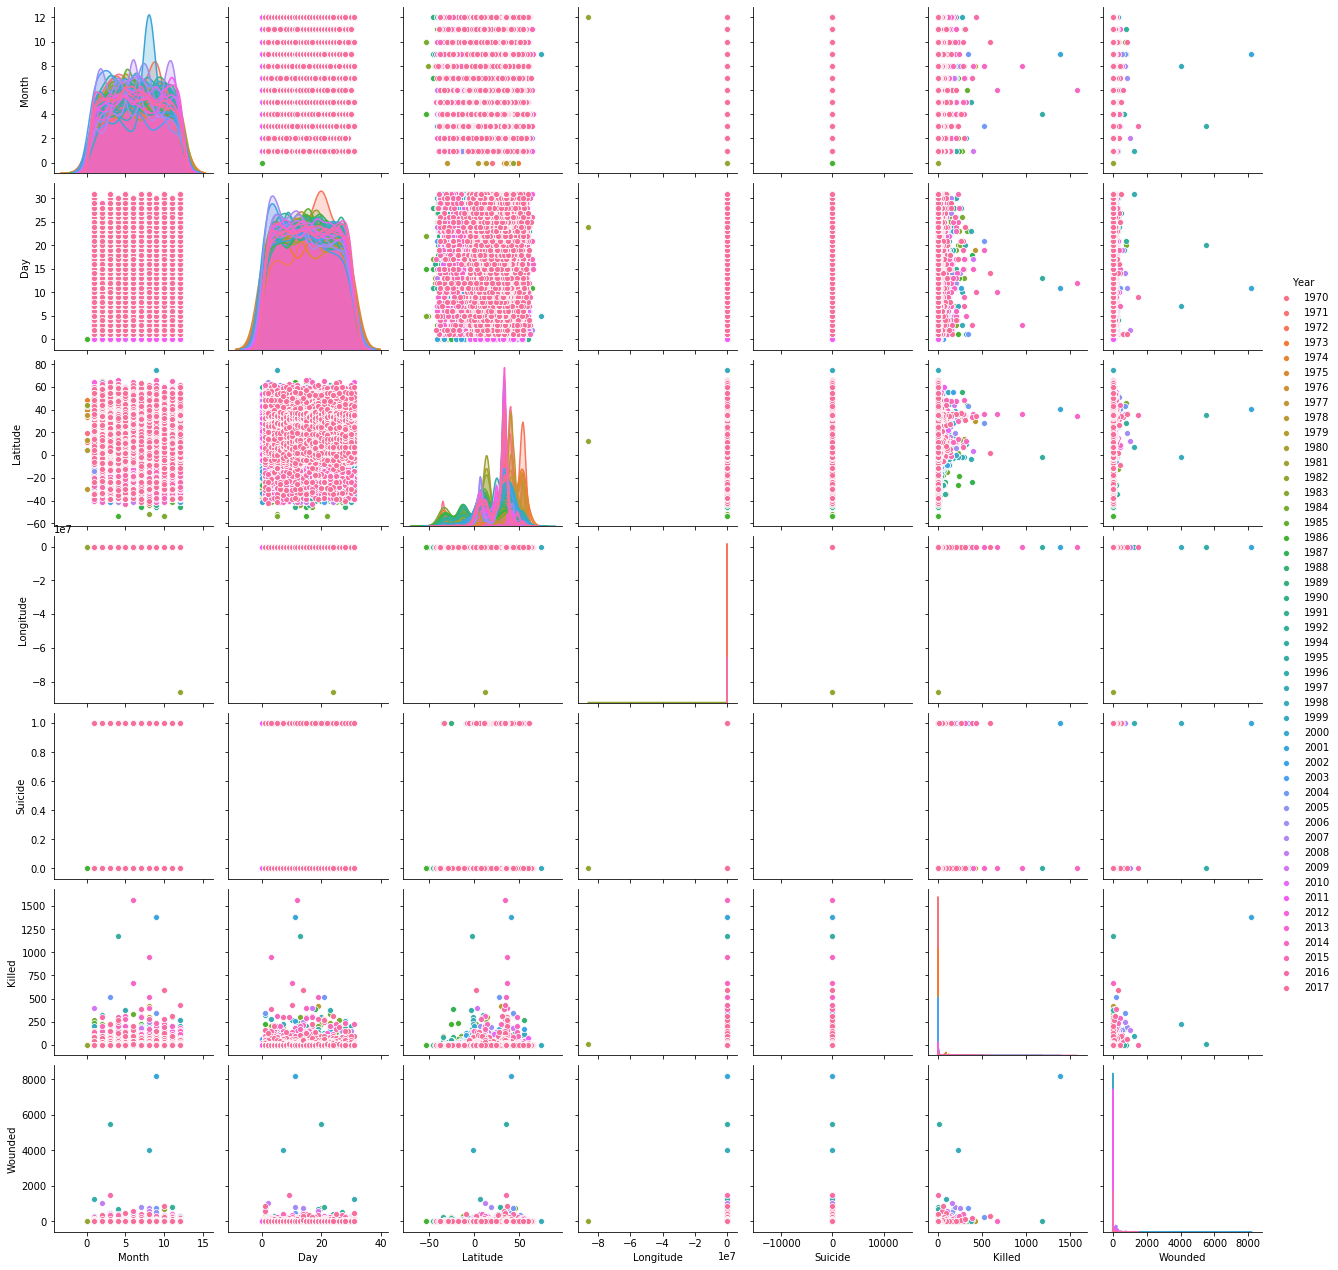

In [12]:
#Relation among the numerical features
sns.pairplot(df,hue='Year')
plt.show()

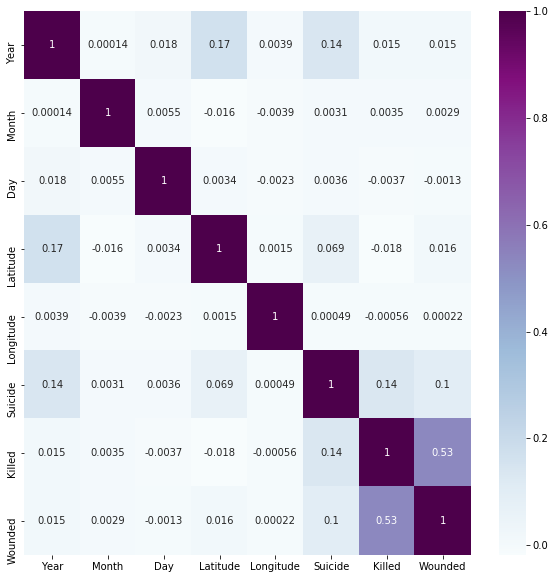

In [13]:
#Correlation coefficient among the numerical features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, cmap="BuPu")
plt.show()

### Most Affected Area by Terror attacks World wide

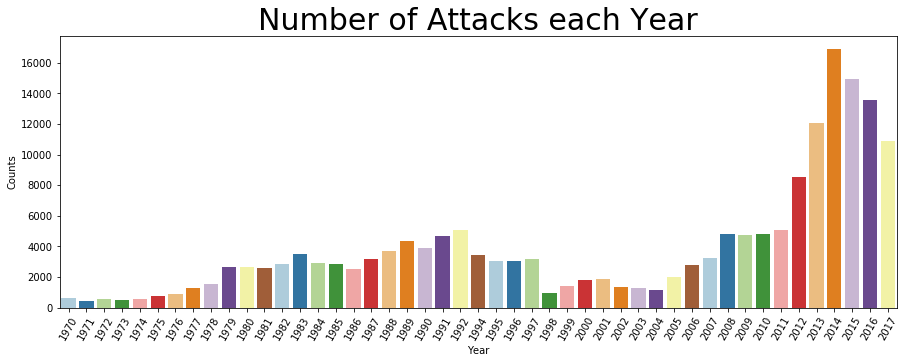

In [14]:
#Number of Attacks each Year
x_year = df['Year'].unique()
y_year = df['Year'].value_counts(dropna = True).sort_index()
plt.figure(figsize=(15,5))
sns.barplot(x=x_year,y=y_year,palette='Paired')
plt.title("Number of Attacks each Year",fontsize=30)
plt.xticks(rotation=60)
plt.ylabel('Counts')
plt.xlabel('Year')
plt.show()

##### INSIGHT :  Number of terror attacks are increasing every year and there is a huge increase in global terror attacks from 2012 to 2014. Between 2015-2017 attacks have been decreased but still it's high.

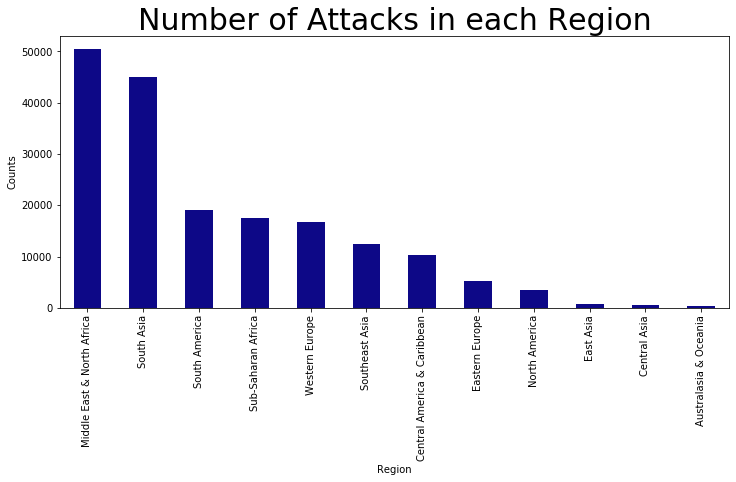

In [15]:
#Number of Attacks in each Region
attacked_regions = df['Region'].value_counts()
attacked_regions.plot(kind='bar',figsize=(12,5),stacked=True, colormap='plasma')
plt.title("Number of Attacks in each Region",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('Region')
plt.show()

##### INSIGHT : Middle East & North Africa, South Asia are the most attacked regions. There is very least attacks on Australasia & Oceania region

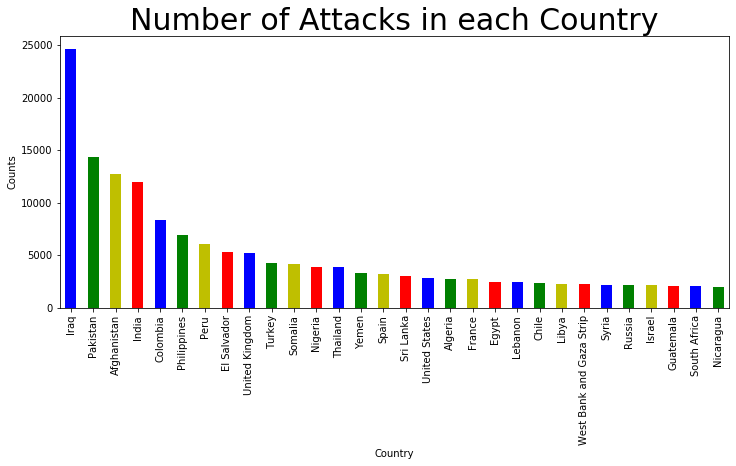

In [16]:
#Number of Attacks in Country-wise
attacked_countries = df['Country'].value_counts().head(30)
my_colors = ['b','g','y','r'] 
attacked_countries.plot(kind='bar',figsize=(12,5),stacked=True, color=my_colors)
plt.title("Number of Attacks in each Country",fontsize=30)
plt.ylabel('Counts')
plt.xlabel('Country')
plt.show()

##### Hot zones of terrorism are - Iraq, Pakistan, Afghanistan, India.

#### Visualising the Global terror attack count World-wide

In [17]:
df1 = df.groupby(['Country'],as_index=False).count()

In [18]:
import plotly.express as px
px.choropleth(df1,locations='Country',locationmode='country names',color='Year',hover_name='Country',title='Total Number of attacks (1970-2017)',labels={'Year':'Attacks'})

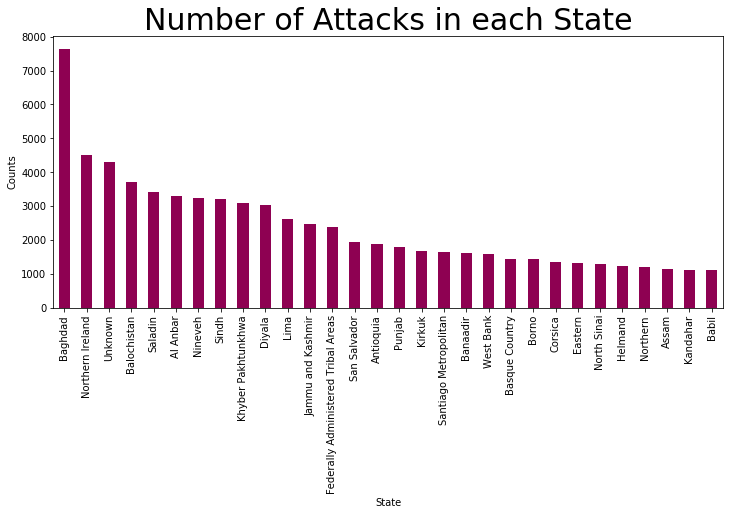

In [19]:
#State with most attacks
attacked_states = df['State'].value_counts().head(30)
attacked_states.plot(kind='bar',figsize=(12,5),stacked=True, colormap='PiYG')
plt.title("Number of Attacks in each State",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('State')
plt.show()

In [20]:
#Grouping State & City
places = df.groupby(['State', 'City']).size().reset_index(name='Total Attacks')
places = places.sort_values(by='Total Attacks',ascending=False).head(30)

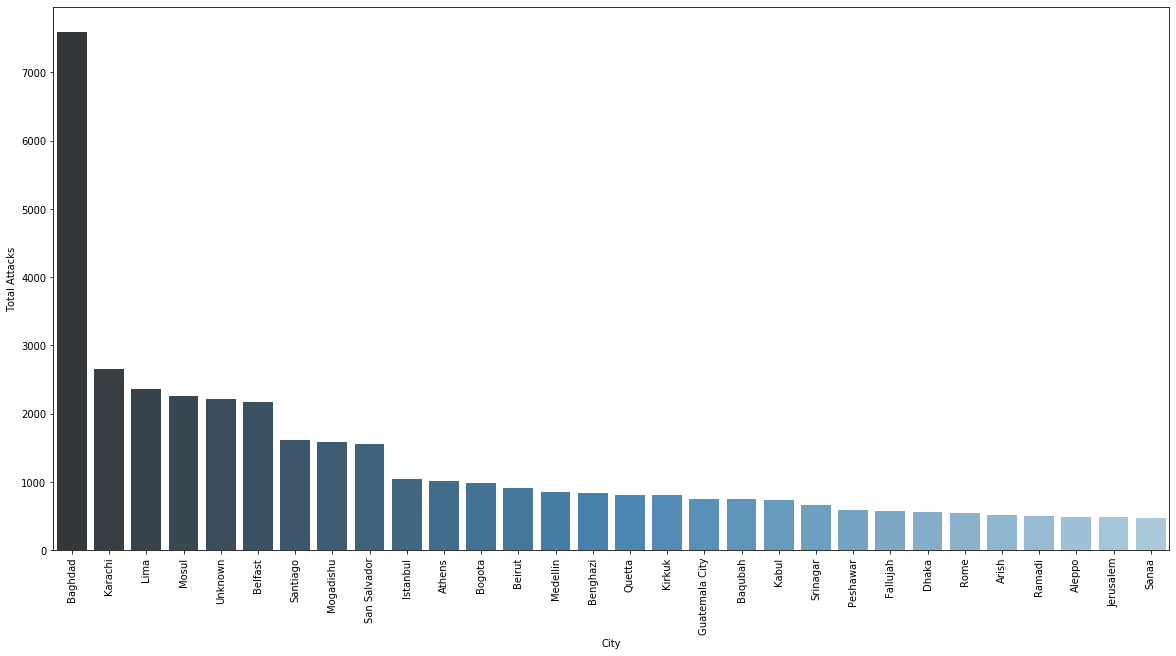

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x='City',y='Total Attacks',data=places.head(30),palette="Blues_d")
plt.xticks(rotation=90)
plt.show()

##### INSIGHT : Most terrorist attacks are on Baghdad, which is the capital city of Iraq. Let's check whom they are targetting.

### Number of Casualties World wide

In [22]:
#Total number of Casualties(Killed+Wounded)
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['Casualties'] = df['Killed'] + df['Wounded']

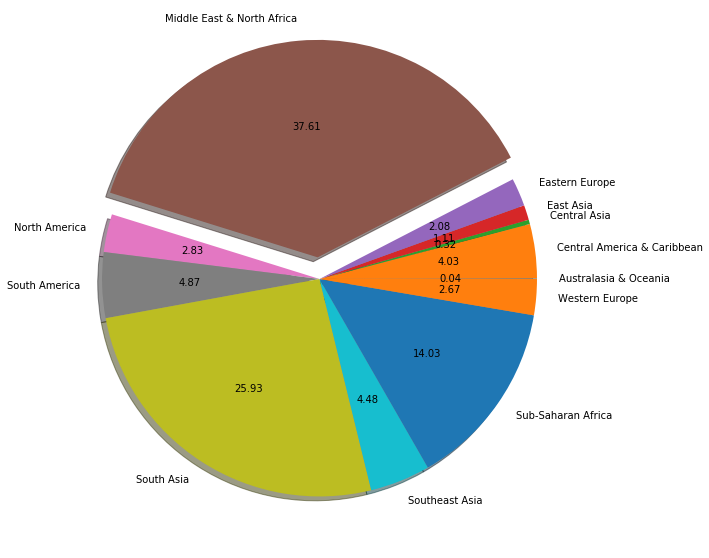

In [23]:
#Region wise Casualties
plt.figure(figsize=(10,10))
region_casualty = df.groupby('Region').sum()['Casualties']
plt.pie(region_casualty, labels=region_casualty.index, autopct='%.2f', explode=(0,0,0,0,0,0.1,0,0,0,0,0,0), shadow=True)
plt.show()

##### It is obvious that number of casualties will be more on those areas where terrorist attack is more.

### Weapon used by most of the Terrorists to attack :

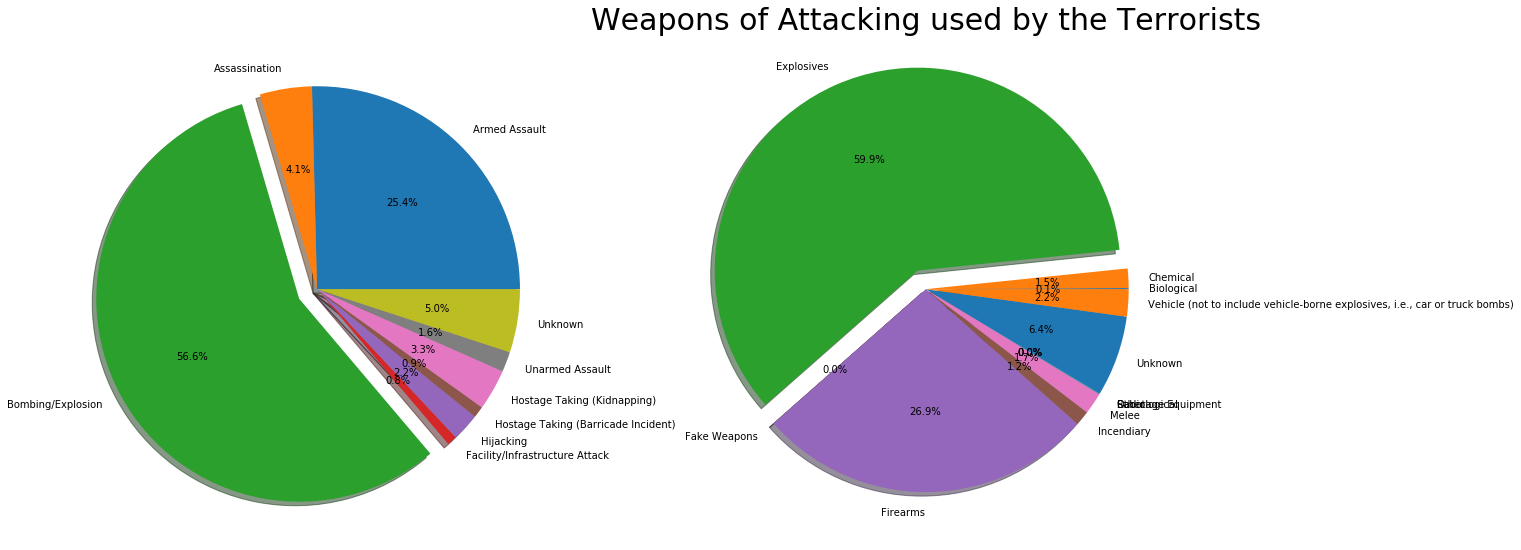

In [24]:
attacked_type = df.groupby('Attack_Type').sum()['Casualties']
weapon_type = df.groupby('Weapon_Type').sum()['Casualties']

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20))

ax1.pie(attacked_type,labels = attacked_type.index ,autopct = '%1.1f%%',explode=(0,0,0.1,0,0,0,0,0,0), shadow=True) 

ax2.pie(weapon_type,labels = weapon_type.index ,autopct = '%1.1f%%',explode=(0,0,0.1,0,0,0,0,0,0,0,0,0), shadow=True) 

plt.title('Weapons of Attacking used by the Terrorists',fontsize=30)
plt.show()

##### INSIGHT : Bombs/Explosives are used by most of the terrorists to attack. 

### Target of the Terrorists :

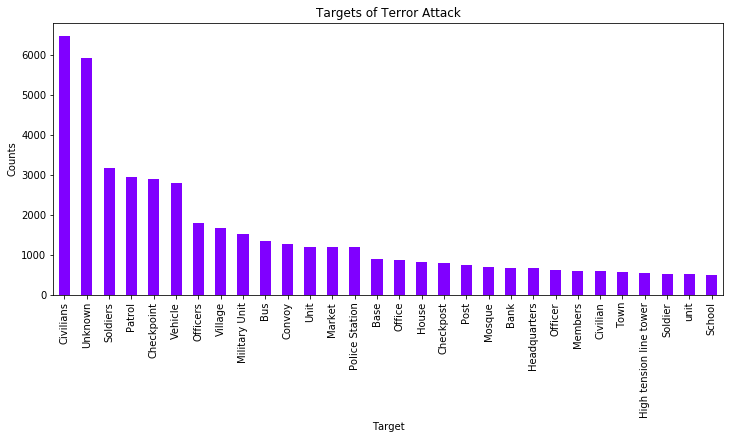

In [25]:
#'Target'
target = df['Target'].value_counts().head(30)
target.plot(kind='bar',figsize=(12,5),stacked=True, colormap='rainbow')
plt.title("Targets of Terror Attack")
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('Target')
plt.show()

##### INSIGHT :  Mostly Civilians, Soldiers and Army people are suffering by those attacks.

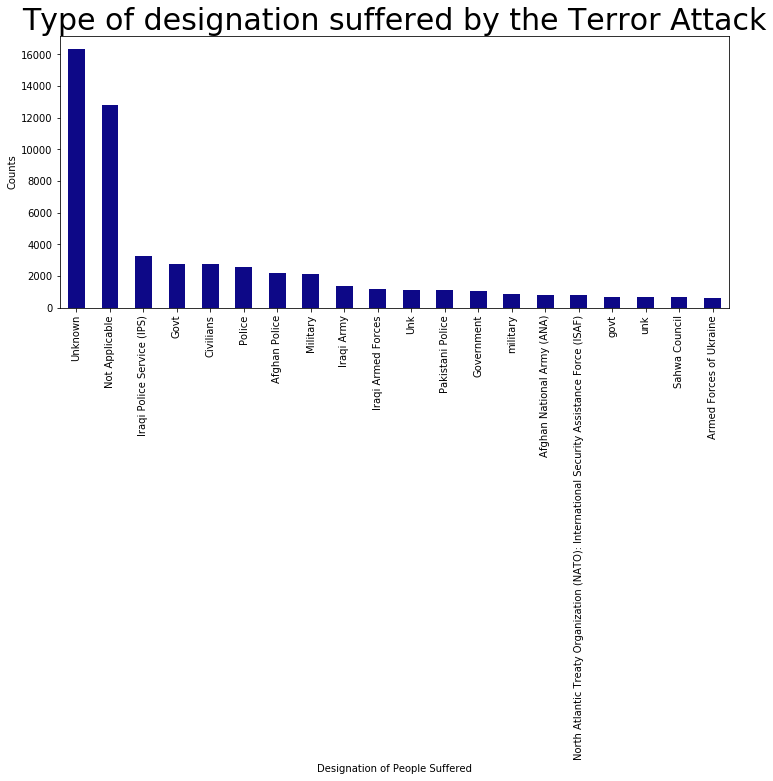

In [26]:
#'Corporate'
corp = df['Corporate'].value_counts().head(20)
corp.plot(kind='bar',figsize=(12,5),stacked=True, colormap='plasma')
plt.title("Type of designation suffered by the Terror Attack",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.xlabel('Designation of People Suffered')
plt.show()

##### INSIGHT : 'Unknown' & 'Not Applicable' means that their profession data is not available. They may be the Civilians, who were most suffered.

In [27]:
print("Name of Terrorist Groups :")
df['Terrorist_Group'].value_counts().head(40)

Name of Terrorist Groups :


Unknown                                                        82782
Taliban                                                         7478
Islamic State of Iraq and the Levant (ISIL)                     5613
Shining Path (SL)                                               4555
Farabundo Marti National Liberation Front (FMLN)                3351
Al-Shabaab                                                      3288
New People's Army (NPA)                                         2772
Irish Republican Army (IRA)                                     2671
Revolutionary Armed Forces of Colombia (FARC)                   2487
Boko Haram                                                      2418
Kurdistan Workers' Party (PKK)                                  2310
Basque Fatherland and Freedom (ETA)                             2024
Communist Party of India - Maoist (CPI-Maoist)                  1878
Maoists                                                         1630
Liberation Tigers of Tamil Eelam (

##### There are so many terrorist groups exist world wide.

### Number of Suicide Attacks :
This is another type of attack that the terrorist use. They make someone looks normal so that he can enter to the country and explode himself, along with civilians/soldiers.

In [28]:
data = df.Suicide.value_counts()

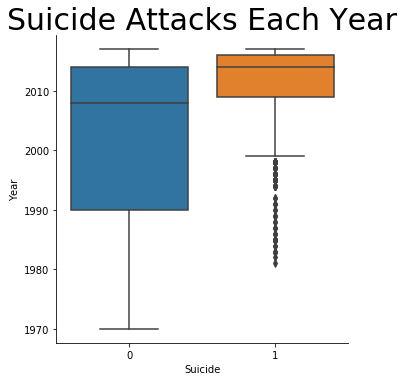

In [29]:
#Number of Suicide Attacks each year
sns.catplot(x="Suicide", y="Year", kind='box',data=df)
plt.title("Suicide Attacks Each Year",fontsize=30)
plt.show()

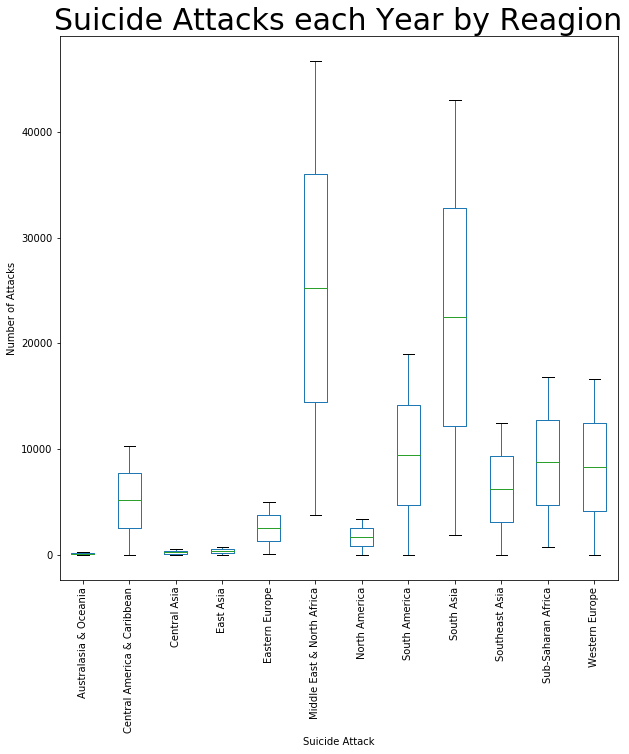

In [30]:
#Suicide Attack each year by region(0='No',1='Yes')
pd.crosstab(df.Suicide,df.Region).plot(kind='box',figsize=(10,10))
plt.title("Suicide Attacks each Year by Reagion",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.xlabel('Suicide Attack')
plt.show()


##### INSIGHT :  Number of suicide attacks have been increased after 2010. Security checkings need to be improved in Middle East & North Africa and South Asia regions.

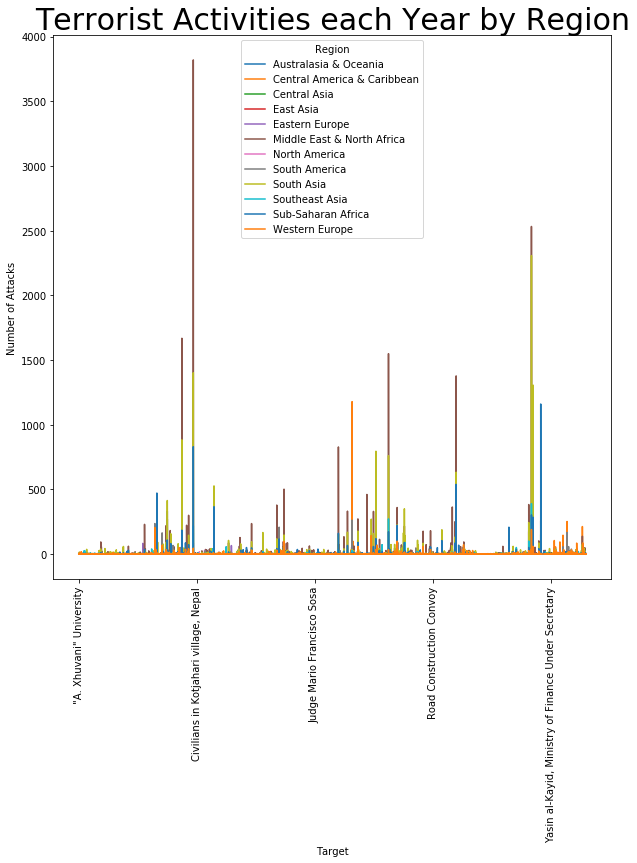

In [31]:
#Target area of terrorist activities by region
pd.crosstab(df.Target,df.Region).plot(kind='line',figsize=(10,10))
plt.title("Terrorist Activities each Year by Region",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.xlabel('Target')
plt.show()


##### INSIGHT : Region wise, after civilians, Govt. officials are more targeted by the terrorists. Govt. should increase their as well as civilian's security level. 